## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline

We have imprted the required libraries

## Reading Data

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')

We are reading the dataset in Pandas

## Data Description

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [5]:
df.shape

(48895, 16)

This shows the number of attributes and number of rows that are present.

In [6]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

It shows the number of columns that are present.

In [7]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

The data tyoe of each column is shown.

In [8]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## Some Visualization

Text(0.5, 1.0, 'Location Based on Latitude and Longitude')

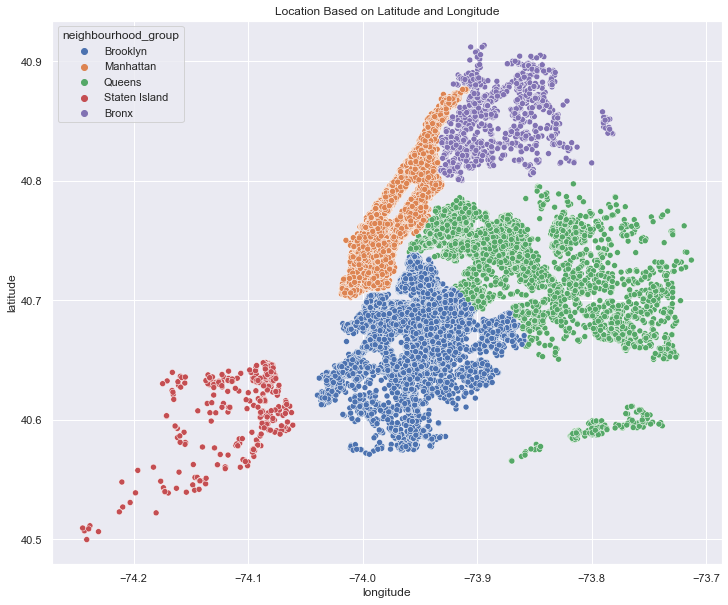

In [9]:
sns.set(rc = {"figure.figsize": (12, 10)})
ax = sns.scatterplot(data = df, x = "longitude", y = "latitude",hue = 'neighbourhood_group')
ax.set_title('Location Based on Latitude and Longitude')

Text(0.5, 1.0, 'Type of Rooms')

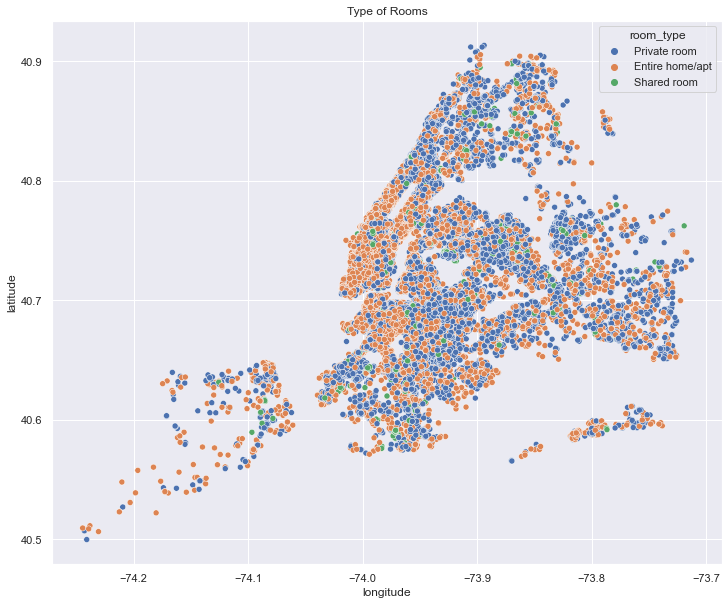

In [10]:
sns.set(rc = {"figure.figsize": (12, 10)})
ax = sns.scatterplot(x = df.longitude, y = df.latitude,hue = df.room_type)
ax.set_title('Type of Rooms')

This vizualisation shows us how types of rooms are spread/ present in the five neighbourhood_group.

## Finding Missing and Duplicate Values

In [11]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [12]:
df.duplicated().sum()

0

## Dealing with Missing Value

In [13]:
df.loc[df.number_of_reviews==0, 'reviews_per_month'] = 0
df.loc[df.number_of_reviews==0, 'last_review'] = 0

df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,0.00,6,2


In [14]:
df = df[pd.notnull(df['name'])]
df = df[pd.notnull(df['host_name'])]

df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,0.00,6,2


We are cleaning the data by removing the rows that have null values and cannot be replaced by any other value that is name and host_name attributes.

We checked and found that both the attributes last_review and reviews_per_month have same number of null values and we can say that for those AirBNB we dont have any reviews till date and that is the reason why last_review and reviews_per_month arrtibutes have null value.We should have a attribute named "Total_number_of_reviews" to check if these Airbnbs have any review or not.

In [15]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

We have removed the null values.

In [ ]:
strange_observation_deletion

## Outlier Detection

### Price

C:\Users\gaura\anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


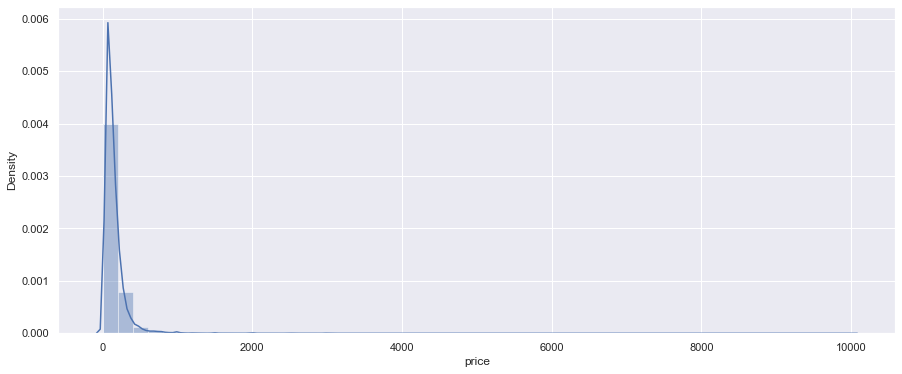

In [16]:
f,ax = plt.subplots(figsize = (15,6))
sns.distplot(df.price);

C:\Users\gaura\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


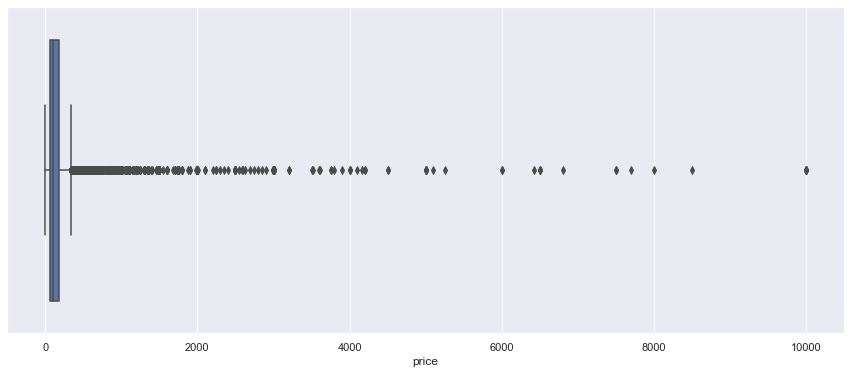

In [17]:
f,ax = plt.subplots(figsize = (15,6))
sns.boxplot(df.price);

In [18]:
np.mean(df.price)

152.74030864955586

In [19]:
len(df[df.price > 2000])

86

### Minimum Nights

C:\Users\gaura\anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


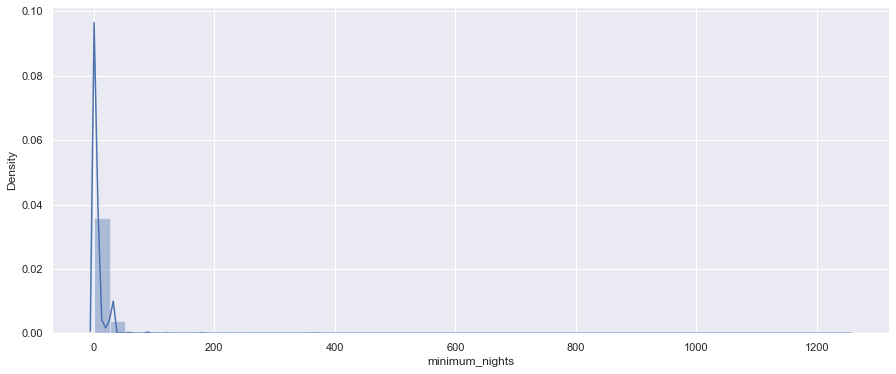

In [20]:
f,ax = plt.subplots(figsize = (15,6))
sns.distplot(df.minimum_nights);

C:\Users\gaura\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


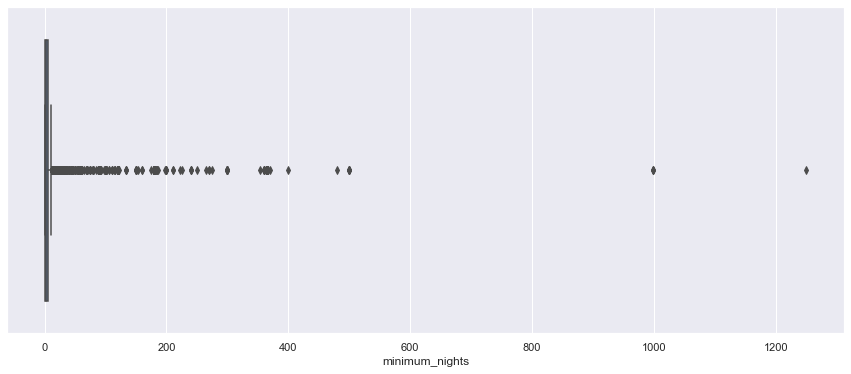

In [21]:
f,ax = plt.subplots(figsize = (15,6))
sns.boxplot(df.minimum_nights);

In [22]:
np.mean(df.minimum_nights)

7.012444226124688

In [23]:
len(df[df.minimum_nights > 300])

49

### Availability 365

C:\Users\gaura\anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


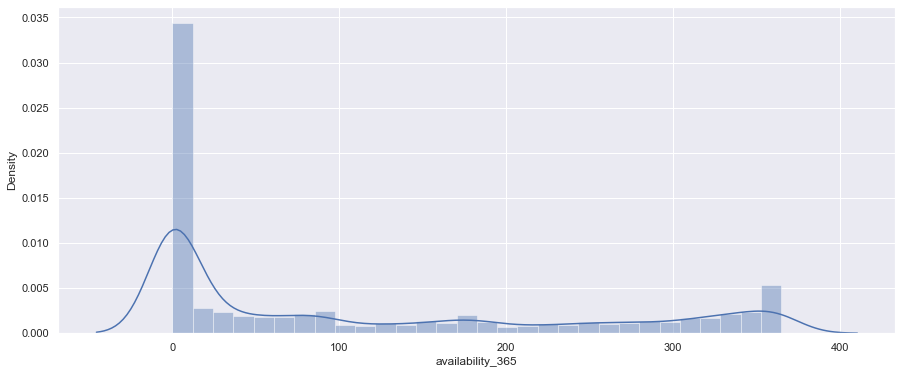

In [24]:
f,ax = plt.subplots(figsize = (15,6))
sns.distplot(df.availability_365);

C:\Users\gaura\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


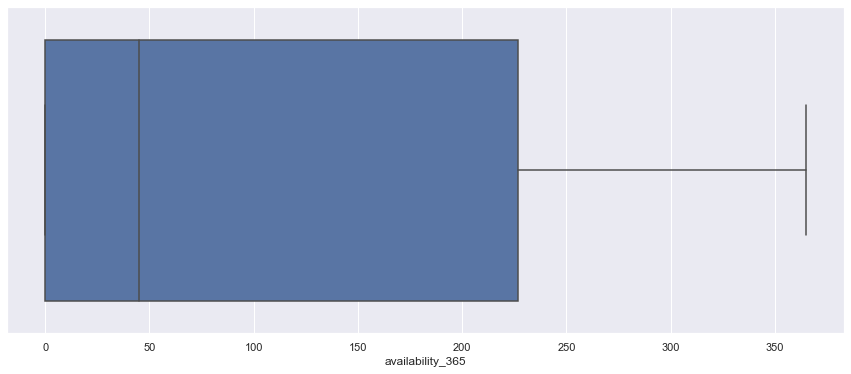

In [25]:
f,ax = plt.subplots(figsize = (15,6))
sns.boxplot(df.availability_365);

In [26]:
np.mean(df.availability_365)

112.80142453641164

In [27]:
len(df[df.availability_365 > 300])

8100

This distribution looks fairly compact and hence doesn't contain outliers.

## Dealing with Outliers

In [28]:
def outlier(data):
    
    sorted(data)
    Q1, Q3 = np.percentile(data , [25,75])
    high = Q3 + (1.5 * (Q3 - Q1))
    low = Q1 - (1.5 * (Q3 - Q1))

    return low, high

### Price

In [29]:
low, high = outlier(df.price)
low, high

(-90.0, 334.0)

In [31]:
df = df[(df.price > low) & (df.price < high)]

C:\Users\gaura\anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


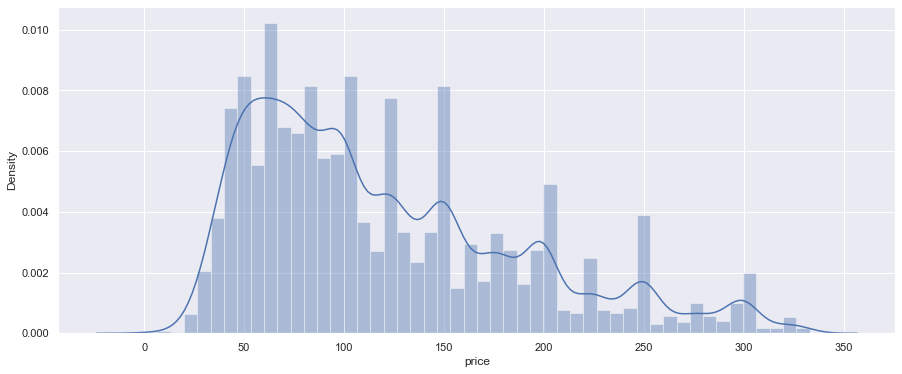

In [32]:
f,ax = plt.subplots(figsize = (15,6))
sns.distplot(df.price);

C:\Users\gaura\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


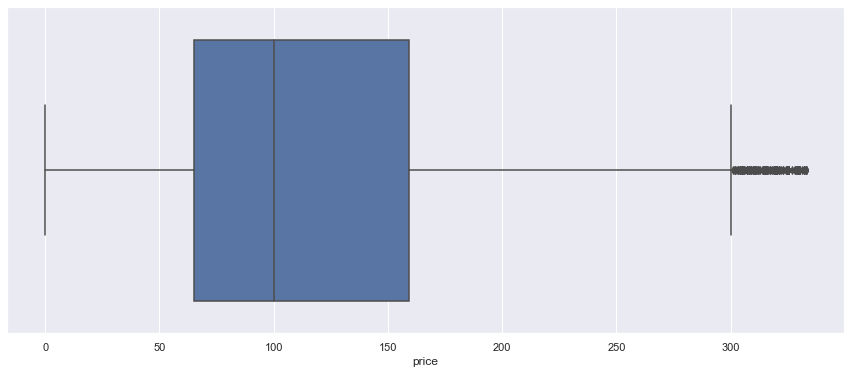

In [33]:
f,ax = plt.subplots(figsize = (15,6))
sns.boxplot(df.price);

### Minimum Nights

In [34]:
low, high = outlier(df.minimum_nights)
low, high

(-5.0, 11.0)

In [36]:
df = df[(df.price > low) & (df.price < high)]

C:\Users\gaura\anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


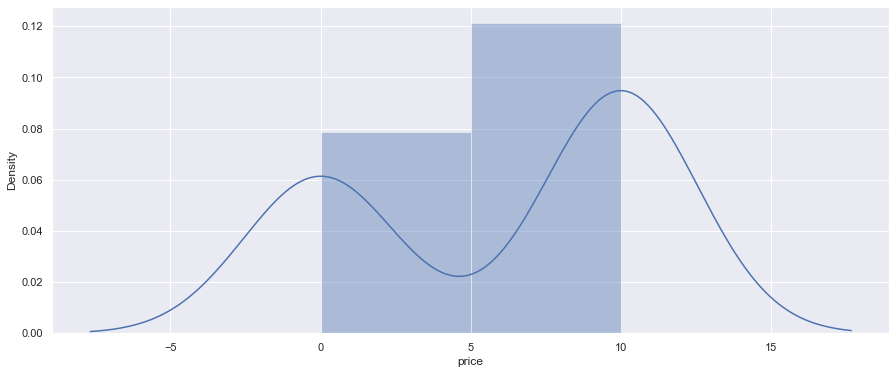

In [37]:
f,ax = plt.subplots(figsize = (15,6))
sns.distplot(df.price);

C:\Users\gaura\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


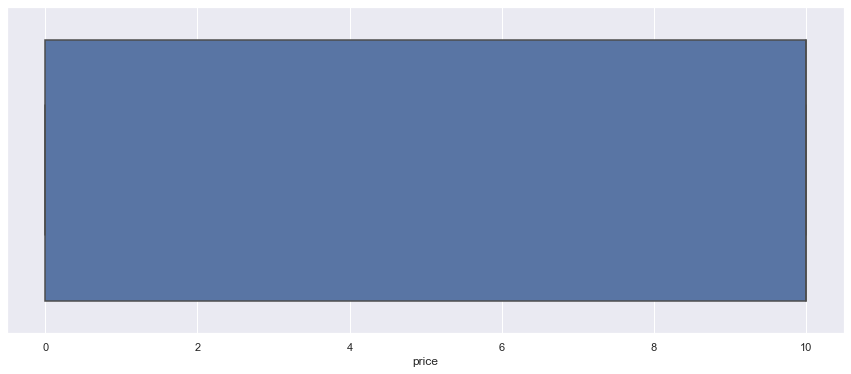

In [38]:
f,ax = plt.subplots(figsize = (15,6))
sns.boxplot(df.price);

## Label Encoding of Catagorical Variables

In [39]:
df['neighbourhood_group'] = LabelEncoder().fit_transform(df['neighbourhood_group'])

df['room_type'] = LabelEncoder().fit_transform(df['room_type'])

df['neighbourhood'] = LabelEncoder().fit_transform(df['neighbourhood'])

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2860,1620248,Large furnished 2 bedrooms- - 30 days Minimum,2196224,Sally,2,3,40.73051,-73.98140,0,10,30,0,0,0.00,4,137
21700,17437106,Couch in Harlem Harvey Refugees only,33511962,Morgan,2,5,40.81302,-73.95349,2,10,1,0,0,0.00,1,0
22261,17952277,"Newly renovated, fully furnished room in Brooklyn",62685070,Katie,1,1,40.69974,-73.91935,1,10,5,0,0,0.00,1,0
22287,17979764,Jen Apt,84497333,Jennifer,2,11,40.72237,-73.99817,1,10,5,2,2017-04-15,0.07,1,0
22835,18490141,IT'S SIMPLY CONVENIENT!,97001292,Maria,3,8,40.69085,-73.79916,0,10,1,43,2019-06-12,1.68,1,252


## Scalling of the Data

In [40]:
df_scale_1 = df
df_scale_2 = df

### Min-Max Scalling

In [41]:
minMaxScaler = preprocessing.MinMaxScaler()

features = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count']
df_scale_1[features] = minMaxScaler.fit_transform(df_scale_1[features])

df_scale_1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2860,1620248,Large furnished 2 bedrooms- - 30 days Minimum,2196224,Sally,2,3,0.395596,0.084140,0,1.0,1.000000,0.000000,0,0.000000,0.6,137
21700,17437106,Couch in Harlem Harvey Refugees only,33511962,Morgan,2,5,0.874971,0.224173,2,1.0,0.000000,0.000000,0,0.000000,0.0,0
22261,17952277,"Newly renovated, fully furnished room in Brooklyn",62685070,Katie,1,1,0.216825,0.395464,1,1.0,0.137931,0.000000,0,0.000000,0.0,0
22287,17979764,Jen Apt,84497333,Jennifer,2,11,0.348304,0.000000,1,1.0,0.137931,0.021053,2017-04-15,0.014799,0.0,0
22835,18490141,IT'S SIMPLY CONVENIENT!,97001292,Maria,3,8,0.165175,0.998495,0,1.0,0.000000,0.452632,2019-06-12,0.355180,0.0,252


### Standard Scalling

In [42]:
standardScaler = StandardScaler()

features = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count']
df_scale_2[features] = standardScaler.fit_transform(df_scale_2[features])

df_scale_2.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2860,1620248,Large furnished 2 bedrooms- - 30 days Minimum,2196224,Sally,2,3,0.176097,-0.990938,0,0.8044,2.834447,-0.678584,0,-0.763236,0.782725,137
21700,17437106,Couch in Harlem Harvey Refugees only,33511962,Morgan,2,5,2.000058,-0.428998,2,0.8044,-0.501163,-0.678584,0,-0.763236,-0.711568,0
22261,17952277,"Newly renovated, fully furnished room in Brooklyn",62685070,Katie,1,1,-0.504102,0.258377,1,0.8044,-0.041079,-0.678584,0,-0.763236,-0.711568,0
22287,17979764,Jen Apt,84497333,Jennifer,2,11,-0.003845,-1.328585,1,0.8044,-0.041079,-0.617094,2017-04-15,-0.717986,-0.711568,0
22835,18490141,IT'S SIMPLY CONVENIENT!,97001292,Maria,3,8,-0.700624,2.678283,0,0.8044,-0.501163,0.643447,2019-06-12,0.322748,-0.711568,252
